# Applications of Clustering and PCA using Python libraries and public datasets

# K-means

In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
cols = df.columns
df.columns = [col.lower() for col in cols]

df.rename(columns={'annual income (k$)' : 'ann_income', 
                    'spending score (1-100)' : 'sp_score'},
                   inplace=True)

df.head()

,customerid,gender,age,ann_income,sp_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

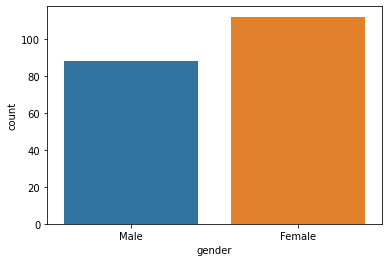

In [5]:
sns.countplot('gender',data=df) # Count Plot of Gender

In [ ]:
sns.boxplot('gender','age',data=df)

In [ ]:
sns.boxplot('gender','ann_income',data=df)

In [ ]:
#Let's check the data before clustering. For this purpose, I will use x1=Age and x2=Spending Score (1-100)

In [6]:
X = df.iloc[:, [3, 4]].values

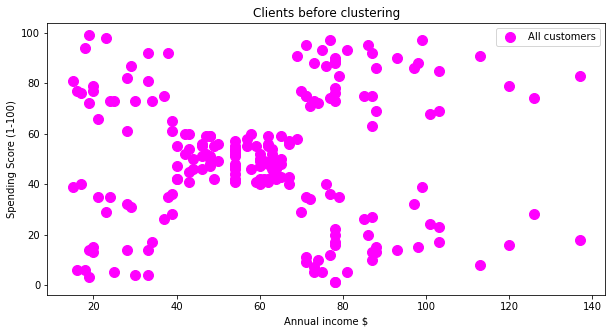

In [7]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='magenta',label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Annual income $')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

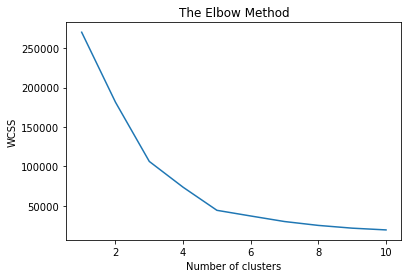

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
#Annual income and spending score of people from 0th cluster
X[y_kmeans==0]

array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92],
       [39, 65]], dtype=int64)

In [14]:
#Annual income from people 0th cluster
X[y_kmeans==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39], dtype=int64)

In [15]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

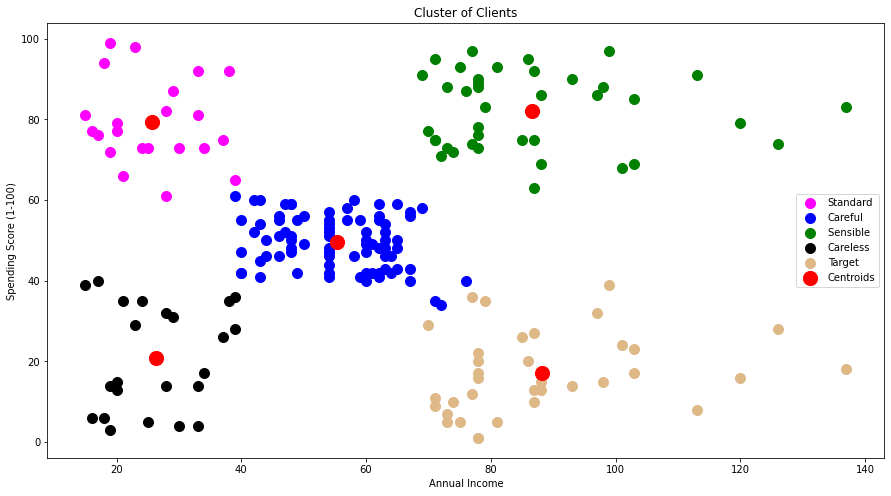

In [16]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Sensible ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Target')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
kmeans.cluster_centers_

# Hierarchical clustering

<b>Hierarchical clustering </b> (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- <b>Agglomerative </b>: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- <b>Divisive </b>: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

## Agglomerative Clustering

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance $O(n^3)$. In sklearn’s implementation, we can specify the number of clusters to assist the algorithm’s performance.

### Algorithm
- Compute the proximity matrix
- Let each data point be a cluster
- Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

Ex. - We have six data points {A,B,C,D,E,F}.

- In the initial step, we consider all the six data points as individual clusters as shown in the image below.

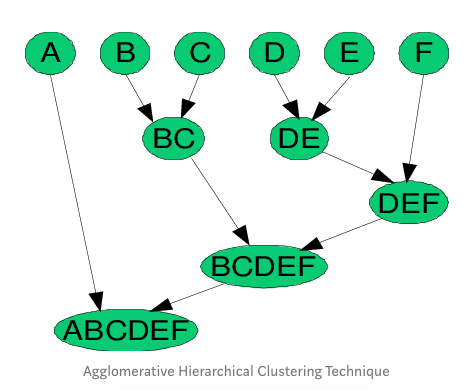

- The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.

#### Computation of proximity/distance matrix

The choice of an appropriate metric will influence the shape of the clusters, as some elements may be close to one another according to one distance and farther away according to another. For example, in a 2-dimensional space, the distance between the point (1,0) and the origin (0,0) is always 1 according to the usual norms, but the distance between the point (1,1) and the origin (0,0) can be 2 under Manhattan distance, $\sqrt2$ under Euclidean distance, or 1 under maximum distance.

Some commonly used metrics for hierarchical clustering are:

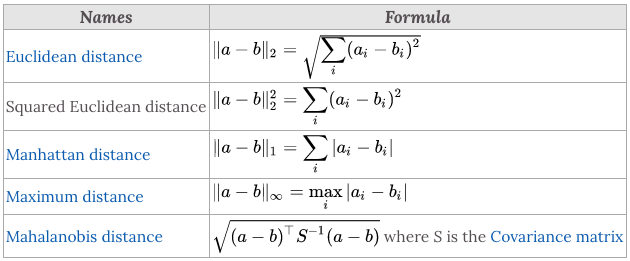

For text or other non-numeric data, metrics such as the Hamming distance or Levenshtein distance are often used.

- Similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F. To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:
     - The maximum distance between elements of each cluster (also called  <b> complete-linkage clustering </b>)
     - The minimum distance between elements of each cluster (also called <b> single-linkage clustering </b>)
     - The mean distance between elements of each cluster (also called <b> average linkage clustering </b>)
     - The sum of all intra-cluster variance.
- Again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
- Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
- Finally, all the clusters are merged together and form a single cluster.



The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

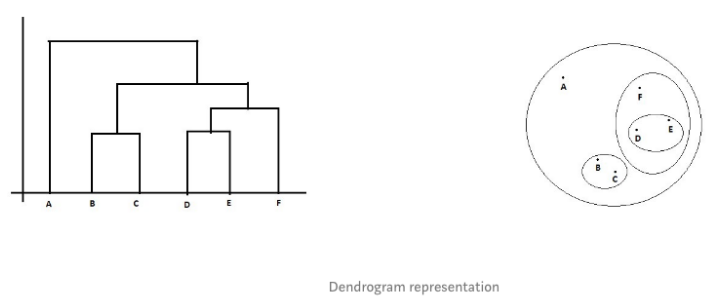

### Example


# Hierarchical

**Importing the dataset**

In [ ]:
# df=pd.read_csv('Mall_Customers.csv')
# df.head()

**Creating the matrix of Features**

In [ ]:
# X=df.iloc[:,[3,4]].values

**Dendogram to find optimal number of clusters**

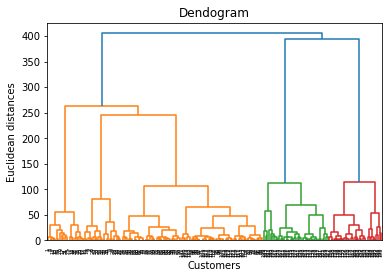

In [17]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We have to look at the longest vertical line which is not intercepted by a horizontal line.After we find out the longest vertical line we have to split it horizontally.All the clusters below the split will be our optimium number of clusters.In the above case 3rd line from left is the longest uninterupted line.If we were to split it with a horizontal line we will get five clusters below it.So five will be the optimium number of clusters for our dataset.

**Fitting Hierarchical clustering to data**

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

**Visualizing the cluster**

In [20]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='Sensible')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()

NameError: name 'y_hc' is not defined

<Figure size 1080x576 with 0 Axes>

Based on the above clusters we can do targetted marketing and increase our sales

# Model

In [19]:
df2 = pd.read_csv('musteriler.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'musteriler.csv'

In [ ]:
df2.head()

In [ ]:
cols = df2.columns
df2.columns = [col.lower() for col in cols]

df2.rename(columns={'cinsiyet' : 'gender', 
                    'yas' : 'age',
                    'hacim':'weight',
                    'maas':'income'
                   },
                   inplace=True)

df2.head()

In [18]:
X_ = df2.iloc[:,3:].values
X_[:,0]#weight
X_[:,1]#income

NameError: name 'df2' is not defined

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X_[:,0],X_[:,1],s=100,c='magenta',label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Weight')
plt.ylabel('Income')
plt.legend()
plt.show()

**K-Means Clustering**

In [ ]:
wcss_2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X_)
    wcss_2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_2)

In [ ]:
kmeans = KMeans( n_clusters = 4, init = 'k-means++')
y_kmeans2= kmeans.fit_predict(X_)


plt.scatter(X_[y_kmeans2==0,0],X_[y_kmeans2==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X_[y_kmeans2==1,0],X_[y_kmeans2==1,1],s=100,c='red',label='Standard')
plt.scatter(X_[y_kmeans2==2,0],X_[y_kmeans2==2,1],s=100,c='blue',label='Standard')
plt.scatter(X_[y_kmeans2==3,0],X_[y_kmeans2==3,1],s=100,c='black',label='Standard')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "yellow")
plt.show()


**Hierarchical Clustering**

In [ ]:
# %% dendogram
merg = linkage(X_,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
#HC

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(X_)

plt.scatter(X_[hc_predict==0,0],X_[hc_predict==0,1],s=100, c='red')
plt.scatter(X_[hc_predict==1,0],X_[hc_predict==1,1],s=100, c='blue')
plt.scatter(X_[hc_predict==2,0],X_[hc_predict==2,1],s=100, c='green')
plt.scatter(X_[hc_predict==3,0],X_[hc_predict==3,1],s=100, c='yellow')
plt.title('HC')
plt.show()

## Clustering

### Biomechanical features of orthopedic patients

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

- pelvic incidence
- pelvic tilt
- lumbar lordosis angle
- sacral slope
- pelvic radius
- grade of spondylolisthesis

In [ ]:
#We read data
df3 = pd.read_csv("column_2C_weka.csv")

In [ ]:
df3.head()

In [ ]:
df3.info()

In [ ]:
def color_generate():
    colors=[]
    for i in df3.loc[:,'class']:
        if i=='Abnormal':
            colors.append('red')
        else:
            colors.append('green')
    return colors
        
pd.plotting.scatter_matrix(df3.loc[:, df3.columns != 'class'],
                                       c=color_generate(),
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       edgecolor= "black")
plt.show()

In [ ]:
sns.pairplot(df3, hue="class", markers=["o", "s"], palette={"Abnormal":"red","Normal":"green"})

In [ ]:
sns.countplot(x="class", data=df3)
df3.loc[:,'class'].value_counts()

In [ ]:
corr=df3.corr()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

We have this data but data point in yellow circle if we drop this data we will wrong with separate clusters that's why we drop it

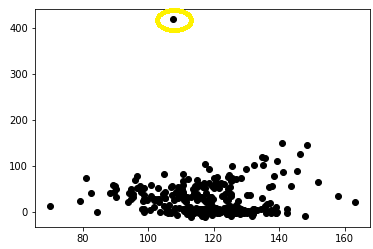

In [ ]:
x1 = df3["pelvic_radius"]
x2 = df3["degree_spondylolisthesis"]
plt.scatter(x1 ,x2 ,color = "black")

In [ ]:
#We ignore this
mean=df3.degree_spondylolisthesis.mean()
a = df3.degree_spondylolisthesis.max()
df3[df3.degree_spondylolisthesis == a] = mean


In [ ]:
#We use sacral_radius and pelvic incidence for showing our cluster.
plt.scatter(x1 ,x2 ,color = "black")


In [ ]:
fig = plt.figure(figsize = (10,5))
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.scatter(df3[df3["class"] == "Normal"].pelvic_radius , df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "green",label="normal")
plt.scatter(df3[df3["class"] == "Abnormal"].pelvic_radius , df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "red",label="anormal")
plt.legend()
plt.show()

In [ ]:
cluster_data=pd.DataFrame({"x1":x1,"x2":x2})
cluster_data

In [ ]:
wcss_3 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(cluster_data)
    wcss_3.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_3)


In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [ ]:
df3['cluster']=y_kmeans

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.scatter(cluster_data['x1'][y_kmeans==0],cluster_data['x2'][y_kmeans==0],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][y_kmeans==1],cluster_data['x2'][y_kmeans==1],s=10,c='red',label='Anormal')



Checking Accuracy

In [ ]:
data_for_acc=pd.read_csv("column_2C_weka.csv")
data_for_acc["class"] = [0 if each == "Abnormal" else 1 for each in data_for_acc["class"]]

In [ ]:
data_for_acc

In [ ]:
actual_class=data_for_acc["class"]
predicted_class=df3['cluster']

In [ ]:
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))

**Hierarcihal Cluster**

Other cluster method is hierarcihal cluster it is not easy than kmeans but kmeans the simplest clusters method to me

In [ ]:

merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:

h_c = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster_hc = h_c.fit_predict(cluster_data)

df3["hc_cluster"] = cluster_hc

In [ ]:
plt.scatter(cluster_data['x1'][cluster_hc==1],cluster_data['x2'][cluster_hc==1],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][cluster_hc==0],cluster_data['x2'][cluster_hc==0],s=10,c='red',label='Anormal')


In [ ]:
df3

#Let's we calculate accuracy.
data_for_acc["class"] = [1 if each == "Abnormal" else 0 for each in data_for_acc["class"]]
actual_class=data_for_acc["class"]
predicted_class=df3['hc_cluster']
#data_ac_class = data_ac["class"]
#predict_class = data["label"]
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))
# hc_accuracy = int(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100))


In [ ]:
df3["hc_cluster"] = [0 if each == 1 else 1 for each in df3["hc_cluster"]]

In [ ]:
df3

**Comparing Cluster's Method**

We compare two accuracy with plotly plot 

In [ ]:
#We compare our model in graph
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(x = df3[df3["class"] == "Normal"].pelvic_radius , y = df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df3[df3["class"] == "Abnormal"].pelvic_radius , y = df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "yellow")
plt.title("original class")

plt.subplot(1, 3, 2)
plt.scatter(x = df3[df3.cluster == 0].pelvic_radius,y = df3[df3.cluster == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df3[df3.cluster == 1].pelvic_radius,y = df3[df3.cluster == 1].degree_spondylolisthesis , color = "red")
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(x = df3[df3.hc_cluster == 0].pelvic_radius,y = df3[df3.hc_cluster == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df3[df3.hc_cluster == 1].pelvic_radius,y = df3[df3.hc_cluster == 1].degree_spondylolisthesis , color = "red")
plt.title("hierarchical")

plt.show()

The accuracy of hierarcihal cluster accuracy is higher than kmeans our data but everytime isn't so 

In [ ]:
#https://setosa.io/ev/principal-component-analysis/

# PCA

Main goal of PCA is identify correlation in data, reduce dimension d to k (k<d) while retaining relevant information.
Find $k$ directions, vectors $u^1$,$u^2$...$u^k$ onto which projection error is the minimum.

<img src="pca.jpg">

Steps in PCA:
- Mean normalization and feature scaling
- Creating covariance matrix and calcuate svd (singular value decomposition)
- Calculating eigenvalues and eigenvectors
- Sort eigenvalues
- Select 'k' eigenvectors
- Constructs projection matrix 'w' from 'k' eigenvectors
- Transform original dataset 'X' via 'w' to obtain 'k' dimensional space 'Y'

In [8]:
import pandas as pd
data = pd.read_csv('Country.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
X = data.iloc[:, 1:10].values
y = data.iloc[:, 0].values

In [14]:
# Yuxarıdakı datada X-lər çaxırın kimyəvi göstəriciləri, y isə clusteringdən sonrakı market seqmentasiyasını bildirir. 
# Növbəti mərhələ bütün X-lari daxil etməklə Logistic Regression əsasında y-i predict etməkdir

In [15]:
y.shape   


(167,)

In [16]:
X.shape

(167, 9)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#PCA tətbiq olunanda əvvəlcə mütləq feature scaling olmalıdır
#We do this on the training set of data.

#1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

#2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

#3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Applying PCA

In [22]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [23]:
explained_variance

array([0.4586754 , 0.17357811])

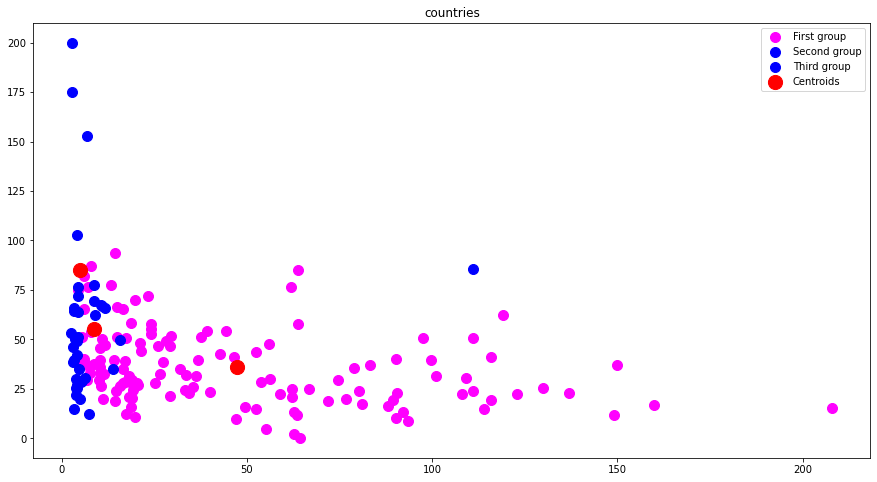

In [27]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [29]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
y_pred

array(['Angola', 'Burkina Faso', 'Switzerland', 'United States',
       'Lithuania', 'United Arab Emirates', 'United States', 'Brazil',
       'South Korea', 'Netherlands', 'United States',
       'Central African Republic', 'Macedonia, FYR', 'Samoa', 'Belgium',
       'Brazil', 'Italy', 'Nigeria', 'United States', 'Malaysia',
       'Rwanda', 'Haiti', 'Eritrea', 'Uganda', 'Liberia', 'South Africa',
       'Sierra Leone', 'Eritrea', 'Equatorial Guinea', 'Costa Rica',
       'Norway', 'Congo, Rep.', 'United States', 'Haiti'], dtype=object)

In [32]:
accuracy_score(y_test, y_pred)

0.0

ValueError: could not convert string to float: 'Sierra Leone'

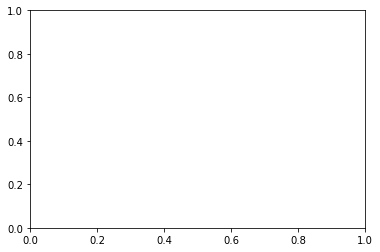

In [33]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
#minimum və maximum dəyərlərin köməyi ilə x1 və x2 (PCA1 və (PCA2) oxlarının aralığı təyin olunur)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


ValueError: could not convert string to float: 'Sierra Leone'

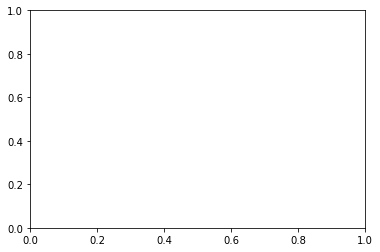

In [34]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()